In [1]:
import scipy
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import os
import particles

In [4]:
%matplotlib inline

In [5]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20, 16)
plt.rcParams['xtick.labelsize'] = 'x-large'
plt.rcParams['ytick.labelsize'] = 'x-large'

In [6]:
low_time=350
time_limit_ix = 818 

In [7]:
micro = 10**-6

In [8]:
def stokes_einstein(dp, T=298):
    kB = 1.38064852*10**-23
    d = (kB*T)/(3*np.pi*0.0001*dp)
    return d

# X-direction

In [32]:
data_direction_2x = '/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/data_v1/m2x/'
data_direction_1x = '/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/data_v1/m1x/'

In [33]:
files_2x = [data_direction_2x+f for f in os.listdir(data_direction_1x)]
files_1x = [data_direction_1x+f for f in os.listdir(data_direction_1x)]

In [34]:
diameters = [d.split('/')[-1].split('_')[1].split('.')[0] for d in files_1x]
diameters

['1000', '1250', '1500', '1750', '2000', '250', '500', '750']

In [35]:
sigma_x2 = []
for f in range(len(files_2x)):
    m2x = pd.read_csv(files_2x[f], index_col=0).mean(axis=1)
    m1x = pd.read_csv(files_1x[f], index_col=0).mean(axis=1)
    sigma_x2.append(m2x-m1x**2)

In [36]:
time = sigma_x2[0].index
df = pd.DataFrame(np.array(sigma_x2).T, columns=diameters, index=time)
da = df[[d for d in df.columns if '250'!=d]]
da = da[[d for d in da.columns if '1250'!=d]]
da = da.reindex(da.columns.astype(int).sort_values().astype(str), axis=1)

In [37]:
da.head(n=1)

,500,750,1000,1500,1750,2000
0,0.0,0.0,0.0,0.0,0.0,0.0


0.978222712099
0.999553096382
0.998561756
0.995877419054
0.998808553217
0.999478813091


Text(0.5,1,u'Spatial Variance: x-direction')

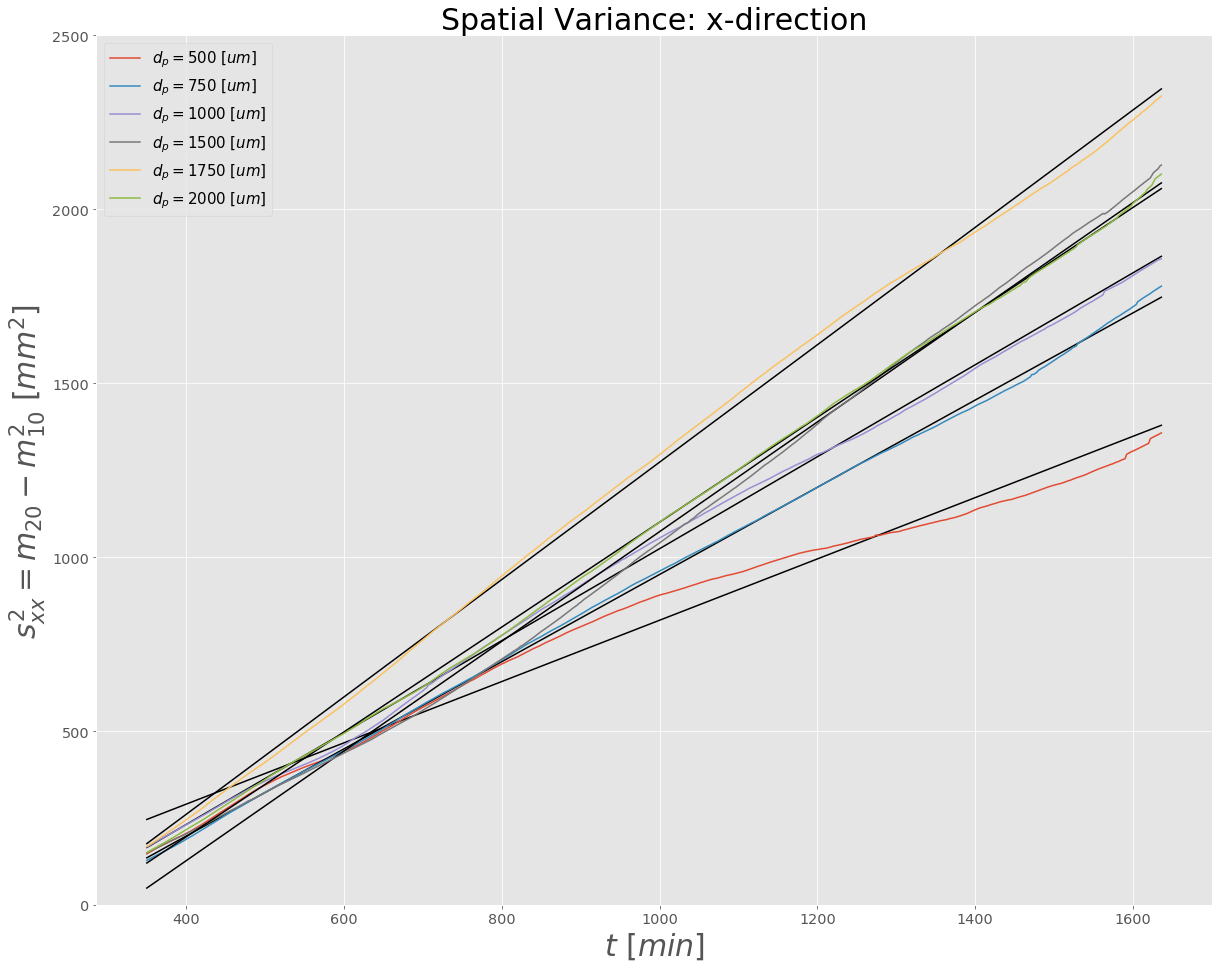

In [38]:
fig, ax = plt.subplots()
data = da.loc[low_time:da.index[time_limit_ix]]
fitting = []
for i in da.columns:
    y = data[i]
    x = data.index
    fit = np.polyfit(x, y, deg=1)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x=x, y=y)
    print(r_value**2)
    ax.plot(x, slope * x +intercept, color='black')
    ax.plot(x,y,label=r'$d_p=$'+i+r' $[um]$')
    fitting.append([slope, intercept])
plt.legend(fontsize=15)
ymin=0
ymax=2500
xmin=0.0
xmax=1800
plt.ylim(ymin,ymax)
plt.xlabel(r'$t$ $[min]$', fontsize=30)
plt.ylabel(r'$s^{2}_{xx}=m_{20}-m_{10}^2$ $[mm^2]$', fontsize=30)
plt.title('Spatial Variance: x-direction', fontsize=30)

In [39]:
fig.savefig('/Users/georgepamfilis/Dropbox/THESIS/Διπλωματική/V1/sxx2.png')

In [40]:
params = np.array(fitting)
params[:,0] = params[:,0]/2
params

array([[  4.40501115e-01,  -6.19572190e+01],
       [  6.26526554e-01,  -3.02488607e+02],
       [  6.60663738e-01,  -2.96608024e+02],
       [  7.88062496e-01,  -5.02459351e+02],
       [  8.43445627e-01,  -4.13466269e+02],
       [  7.53698631e-01,  -4.06440195e+02]])

Text(500,0.8,u'$D_{xx}$$=0.000214404207882*d_p+0.417477767006$')

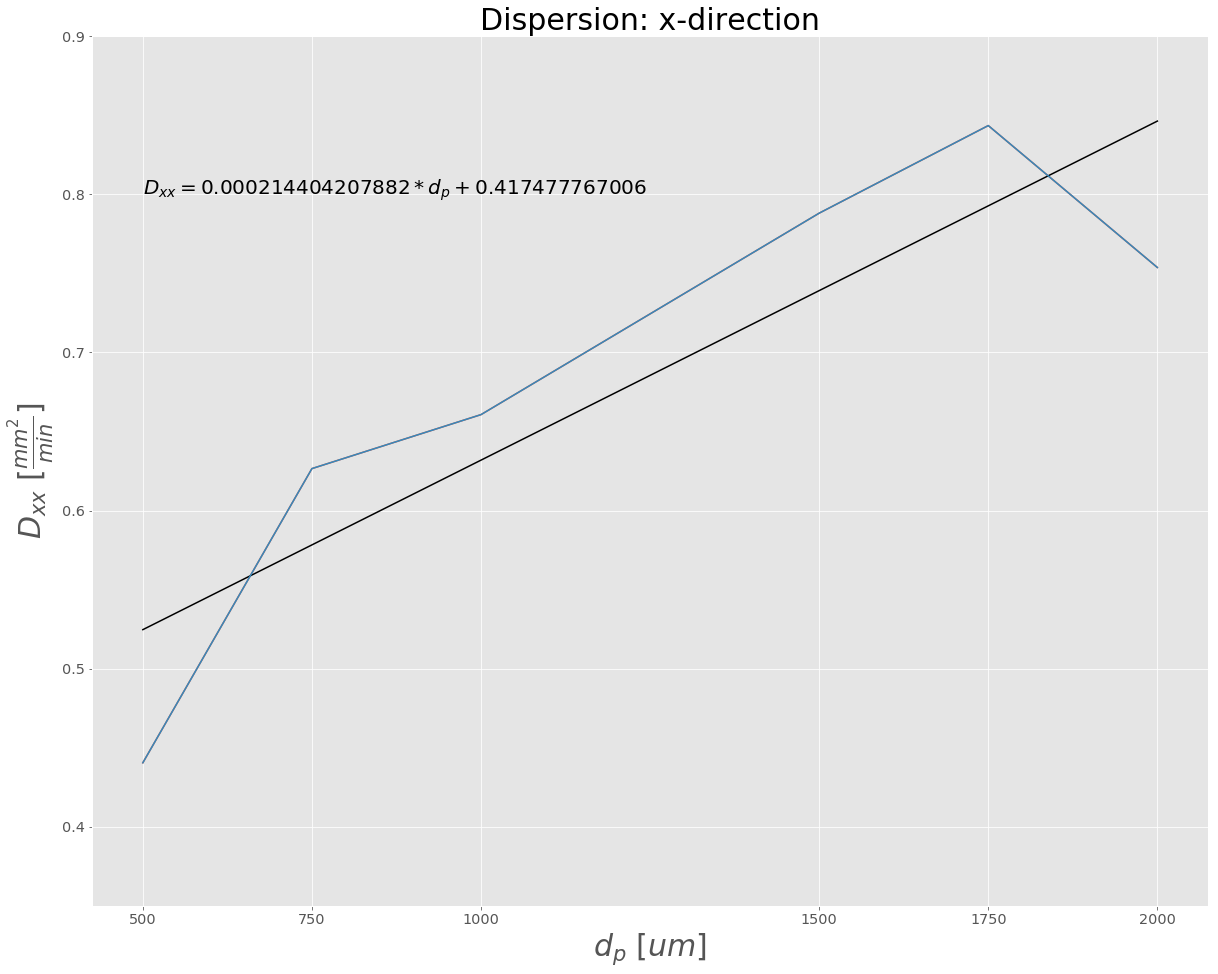

In [41]:
fig, ax = plt.subplots()
x = data.columns.astype(int)
y = params[:,0]
plt.plot(x, y)
slope, intercept, r_value, p_value, std_err = stats.linregress(x=x, y=y)
plt.plot(x, slope * x +intercept, color='black')
plt.plot(x,y)
plt.legend(fontsize=15)
ymin=0.35
ymax=.9
plt.ylim(ymin,ymax)
plt.xticks(x)
plt.ylabel(r'$D_{xx}$ $[\frac{mm^2}{min}]$', fontsize=30)
plt.xlabel(r'$d_p$ $[um]$', fontsize=30)
plt.title('Dispersion: x-direction', fontsize=30)
plt.text(500, 0.8, r'$D_{xx}$'+'$={0}*d_p+{1}$'.format(slope,intercept), fontsize=20)

In [42]:
fig.savefig('/Users/georgepamfilis/Dropbox/THESIS/Διπλωματική/V1/dxx.png')

Text(0.5,1,u'Dispersivity: x-direction')

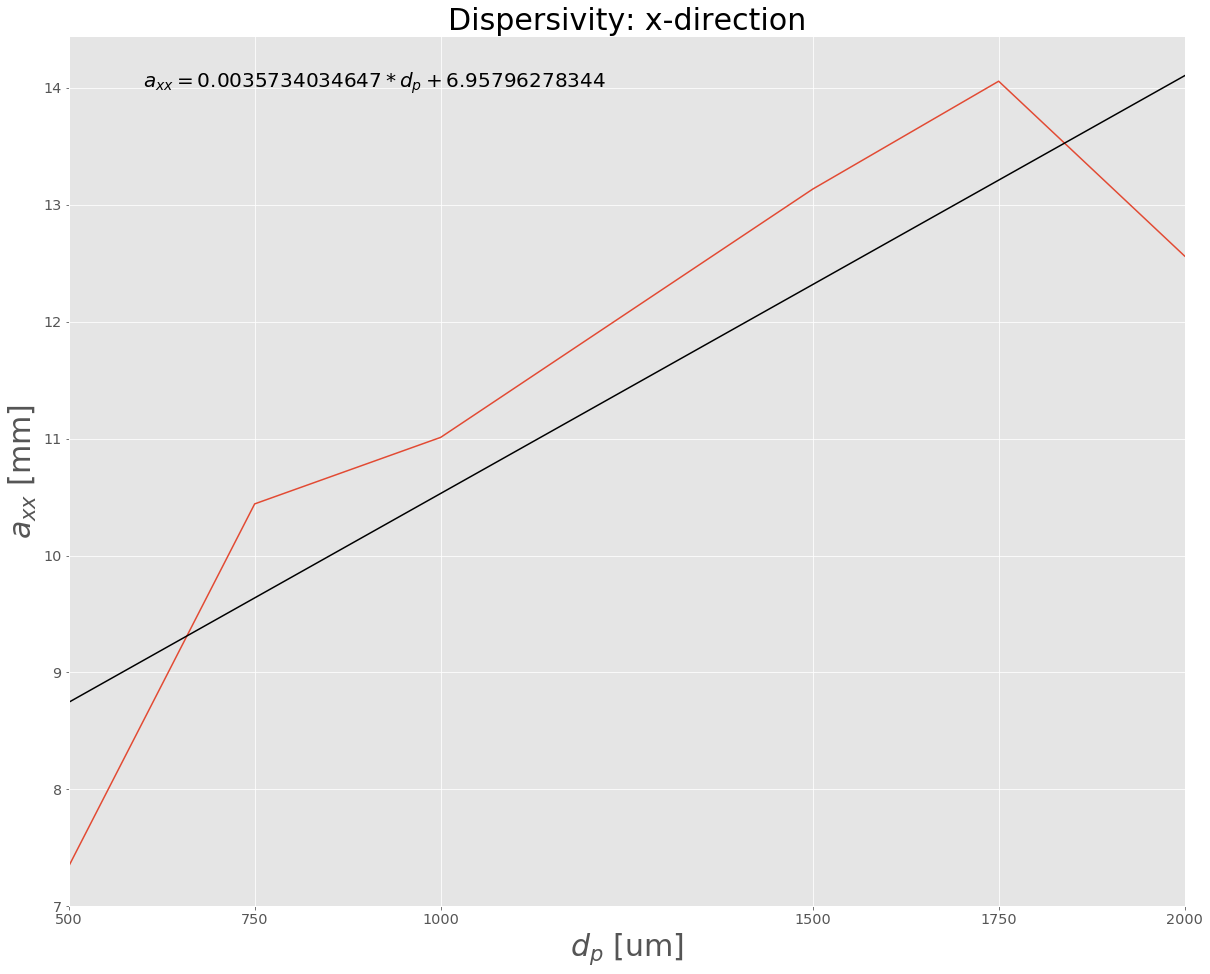

In [43]:
diff = params[:,0] - stokes_einstein(x*micro)
v_av_meters_second =  0.000001 # m/s 
n=1
v_av_millimeters_minite = v_av_meters_second*60*1000
a_x = diff/(v_av_millimeters_minite)**n

fig, ax = plt.subplots()
sns.tsplot(data=a_x,time=x, err_style="ci_bars")
fit = np.polyfit(x, a_x, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='black')
plt.text(600, 14, r'$a_{xx}=$'+r'${0}*d_p+{1}$'.format(fit[0],fit[1]), fontsize=20)
plt.xlabel(r'$d_p$ [um]', fontsize=30)
plt.ylabel(r'$a_{xx}$ [mm]', fontsize=30)
plt.xticks(x);
plt.title('Dispersivity: x-direction', fontsize=30)

In [44]:
fig.savefig('/Users/georgepamfilis/Dropbox/THESIS/Διπλωματική/V1/axx.png')

# y direction

In [45]:
data_direction_2y = '/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/data_v1/m2y/'
data_direction_1y = '/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/data_v1/m1y/'

files_2y = [data_direction_2y+f for f in os.listdir(data_direction_1y)]
files_1y = [data_direction_1y+f for f in os.listdir(data_direction_1y)]

diameters = [d.split('/')[-1].split('_')[1].split('.')[0] for d in files_1y]
diameters

sigma_y2 = []
for f in range(len(files_2y)):
    m2y = pd.read_csv(files_2y[f], index_col=0).mean(axis=1)
    m1y = pd.read_csv(files_1y[f], index_col=0).mean(axis=1)
    sigma_y2.append(m2y-m1y**2)

In [46]:
time = sigma_y2[0].index
df = pd.DataFrame(np.array(sigma_y2).T, columns=diameters, index=time)
da = df[[d for d in df.columns if '250'!=d]]
da = da[[d for d in da.columns if '1250'!=d]]
da = da.reindex(da.columns.astype(int).sort_values().astype(str), axis=1)

('500', 0.0036847764372487757, 0.98450997622960712)
('750', 0.0032183713023823885, 0.98170426043667214)
('1000', 0.0038391544267767103, 0.97623480506405735)
('1500', 0.0036488708297261556, 0.97694936056324555)
('1750', 0.0038379128416077017, 0.96229496955681937)
('2000', 0.0035950205569422133, 0.97290956891214397)


Text(0.5,1,u'Spatial Variance: y-direction')

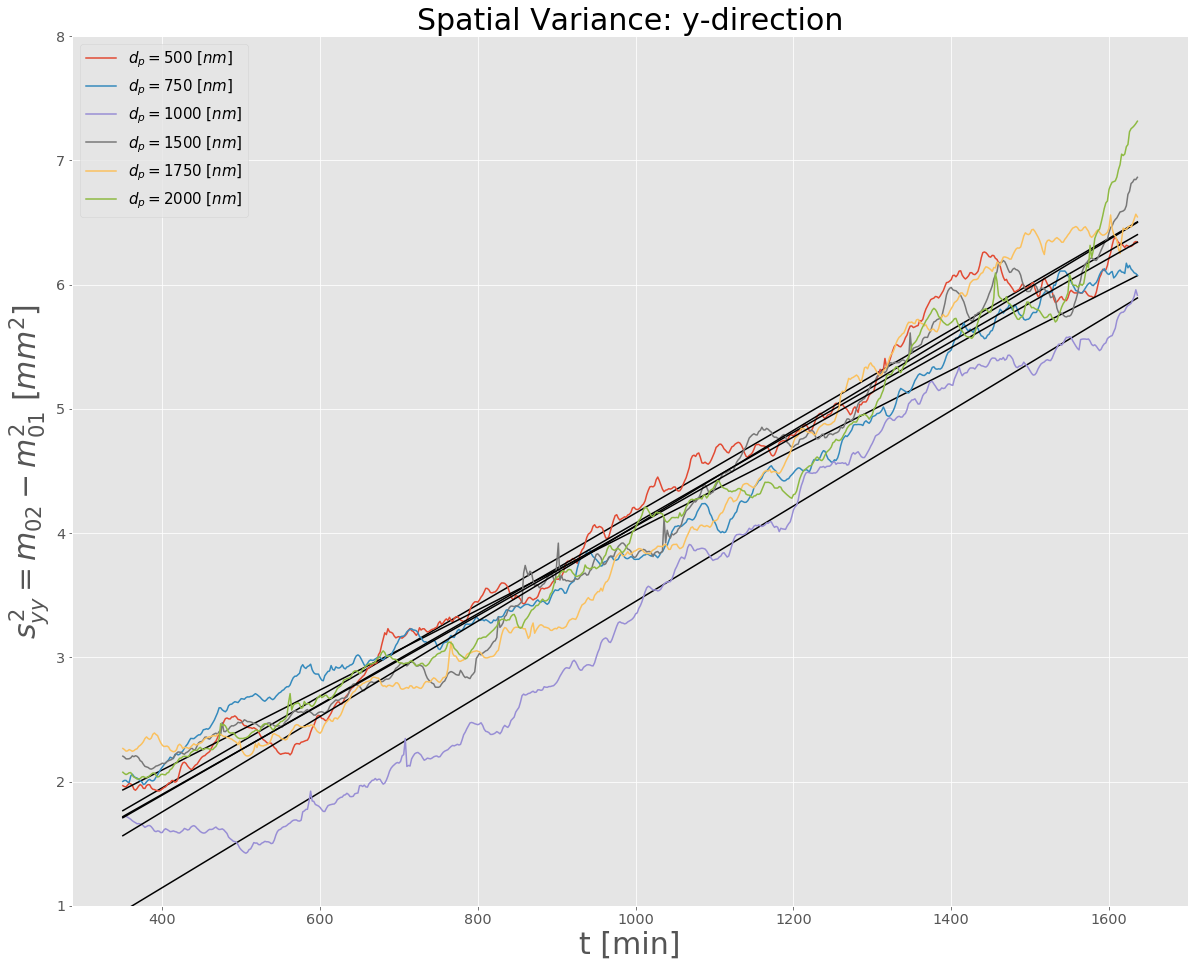

In [47]:
low_time=350
time_limit_ix = 818 

data = da.loc[low_time:da.index[time_limit_ix]]

data.head()

fig, ax = plt.subplots()
fitting = []
for i in da.columns:#range(len(diameters)):
    y = data[i]
    x = data.index
    fit = np.polyfit(x, y, deg=1)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x=x, y=y)
    print(i, slope,r_value**2)
    ax.plot(x, slope * x +intercept, color='black')
    ax.plot(x,y,label=r'$d_p=$'+i+r' $[nm]$')
    fitting.append([slope, intercept])
plt.legend(fontsize=15)
ymin=1
ymax=8
xmin=low_time
xmax=da.index[time_limit_ix]
plt.ylim(ymin,ymax)
plt.xlabel('t [min]', fontsize=30)
plt.ylabel(r'$s^{2}_{yy}=m_{02}-m_{01}^2$ $[mm^2]$', fontsize=30)
plt.title('Spatial Variance: y-direction', fontsize=30)

In [48]:
fig.savefig('/Users/georgepamfilis/Dropbox/THESIS/Διπλωματική/V1/syy2.png')

In [49]:
params = np.array(fitting)
params[:,0] = params[:,0]/2
params

array([[ 0.00184239,  0.47611771],
       [ 0.00160919,  0.80621359],
       [ 0.00191958, -0.38917938],
       [ 0.00182444,  0.43190544],
       [ 0.00191896,  0.22102378],
       [ 0.00179751,  0.4597698 ]])

Text(500,0.00195,u'$D_{yy}$$=5.56808457486e-08*d_p+0.0017490744757$')

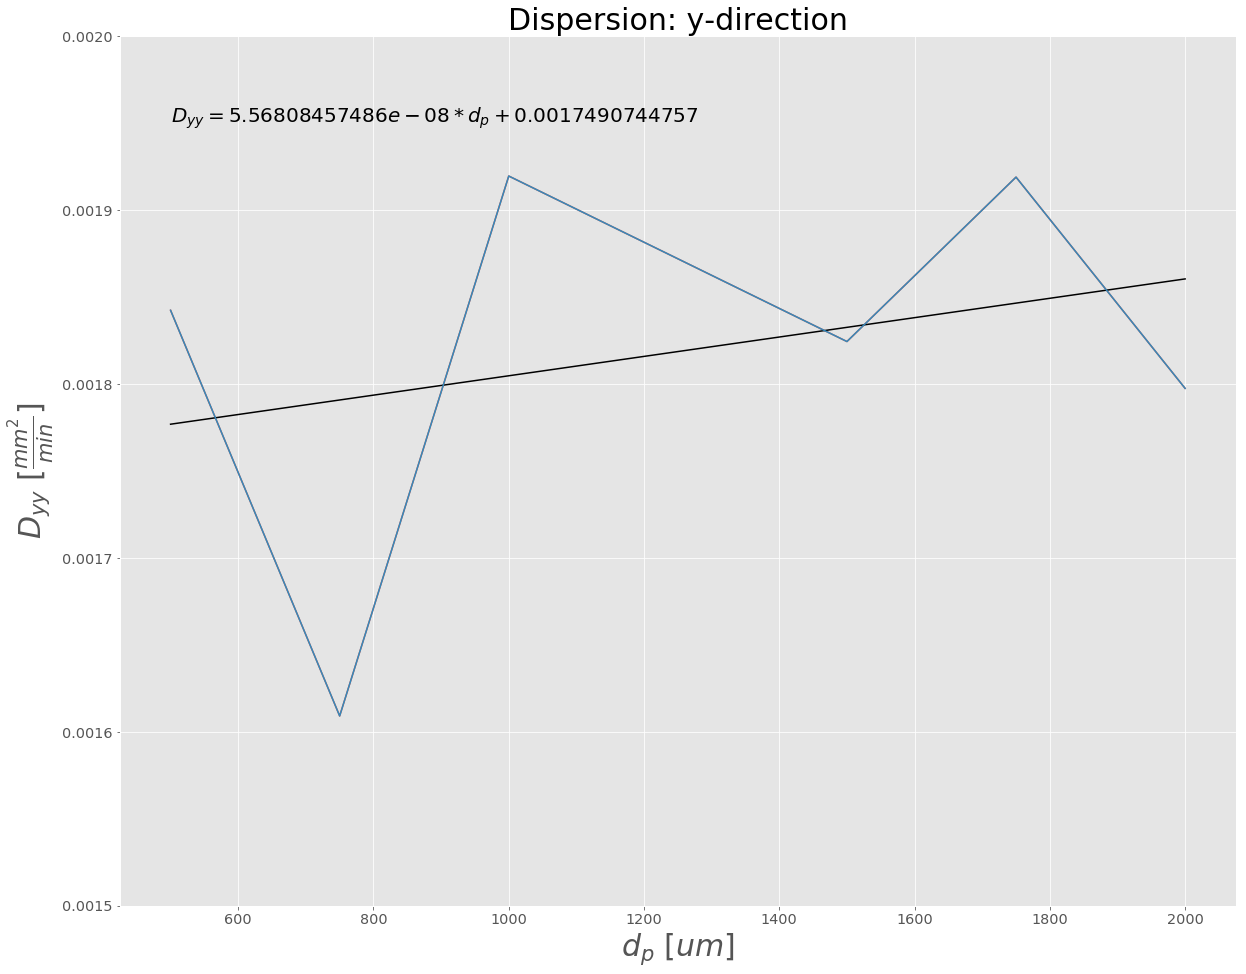

In [50]:
fig, ax = plt.subplots()

x = data.columns.astype(int)
y = params[:,0]
plt.plot(x, y)
slope, intercept, r_value, p_value, std_err = stats.linregress(x=x,y=y)
plt.plot(x, slope * x +intercept, color='black')
plt.plot(x,y)
plt.legend(fontsize=15)
ymin=0.0015
ymax=0.002
plt.ylim(ymin,ymax)
plt.ylabel(r'$D_{yy}$ $[\frac{mm^2}{min}]$', fontsize=30)
plt.xlabel(r'$d_p$ $[um]$', fontsize=30)
plt.title('Dispersion: y-direction', fontsize=30)
plt.text(500, 0.00195, r'$D_{yy}$'+'$={0}*d_p+{1}$'.format(slope,intercept), fontsize=20)

In [51]:
fig.savefig('/Users/georgepamfilis/Dropbox/THESIS/Διπλωματική/V1/dyy.png')

(0.024, 0.034)

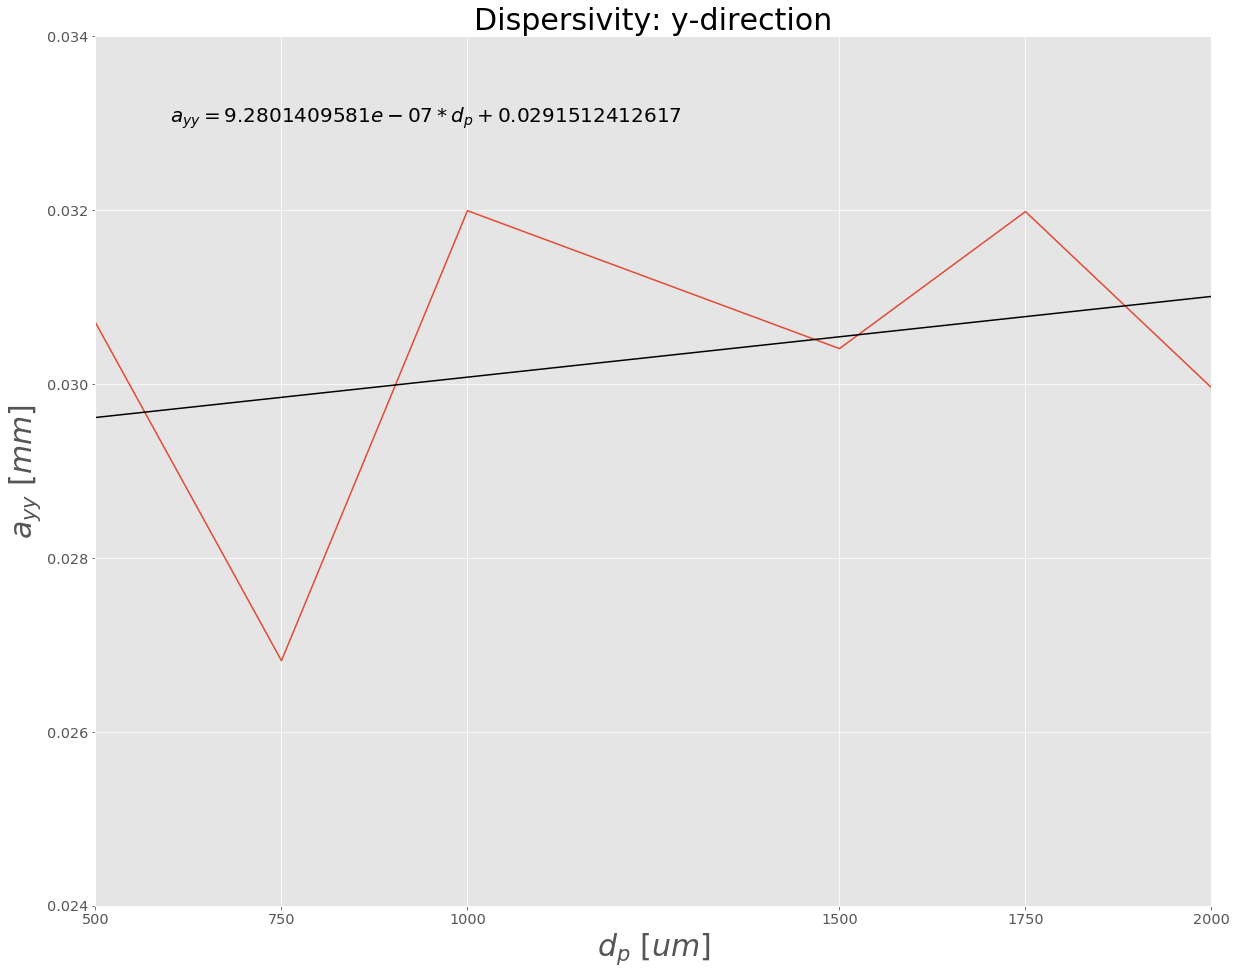

In [52]:
diff = params[:,0] - stokes_einstein(x)

v_av_meters_second =  0.000001 # m/s 
n=1
v_av_millimeters_minite = v_av_meters_second*60*1000
a_y = diff/(v_av_millimeters_minite)**n

fig, ax = plt.subplots()
sns.tsplot(data=a_y,time=x, err_style="ci_bars")
fit = np.polyfit(x, a_y, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='black')
plt.text(600, 0.033, r'$a_{yy}=$'+r'${0}*d_p+{1}$'.format(fit[0],fit[1]), fontsize=20)
plt.xlabel(r'$d_p$ $[um]$', fontsize=30)
plt.ylabel(r'$a_{yy}$ $[mm]$', fontsize=30)
plt.xticks(x);
plt.title('Dispersivity: y-direction', fontsize=30)
plt.ylim(0.024,0.034)

In [53]:
fig.savefig('/Users/georgepamfilis/Dropbox/THESIS/Διπλωματική/V1/ayy.png')

# COMPUTE DISPERSIONS